### Investigating the customer churn count of a telephone company

##### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

##### Importing dataset from folder

In [3]:
data=pd.read_excel('Telco-Customer-Churn.xlsx')
data.head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


##### Exploring the dataset

In [4]:
# To get the no. of rows and columns in the data
data.shape

(7043, 21)

In [5]:
# Checking for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# To view all column names
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
# Descriptive statistics of the data
data_1=data.drop('SeniorCitizen',axis=1)       # Removing categorical variable from the data
data_1.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2290.520629
std,24.559481,30.090047,2274.717686
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.300000
75%,55.000000,89.850000,3808.100000
max,72.000000,118.750000,8684.800000


Text(0.5, 1.0, 'Heatmap')

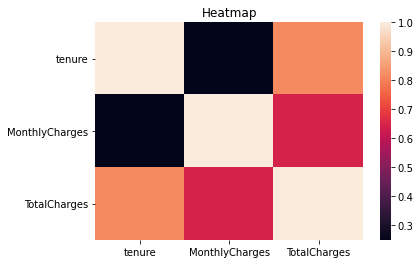

In [8]:
# Plot showing correlation between numerical variables in the data
sns.heatmap(data[['tenure','MonthlyCharges','TotalCharges']].corr())
plt.title('Heatmap')

##### Number of customers who own their connection based on :

##### (a) gender 

In [9]:
x=data['gender'].value_counts()
print(x,'\nThe no. of males who own their connection is',x[0],'and the no. of females is',x[1])

Male      3555
Female    3488
Name: gender, dtype: int64 
The no. of males who own their connection is 3555 and the no. of females is 3488


##### (b) citizenship

In [10]:
data['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

##### Number of customers left their service based on :

In [11]:
data_churn=data[data['Churn']=='Yes']      # Data of customers who left their service

##### (a) Gender

In [12]:
data_churn['gender'].value_counts()

Female    939
Male      930
Name: gender, dtype: int64

##### (b) Citizenship

In [13]:
data_churn['SeniorCitizen'].value_counts()

0    1393
1     476
Name: SeniorCitizen, dtype: int64

#####  Preference of payment method based on :

##### (a) Churn

In [14]:
data.groupby('Churn')['PaymentMethod'].value_counts()

Churn  PaymentMethod            
No     Mailed check                 1304
       Electronic check             1294
       Credit card (automatic)      1290
       Bank transfer (automatic)    1286
Yes    Electronic check             1071
       Mailed check                  308
       Bank transfer (automatic)     258
       Credit card (automatic)       232
Name: PaymentMethod, dtype: int64

##### (b) Contract

In [15]:
data.groupby('Contract')['PaymentMethod'].value_counts()

Contract        PaymentMethod            
Month-to-month  Electronic check             1850
                Mailed check                  893
                Bank transfer (automatic)     589
                Credit card (automatic)       543
One year        Credit card (automatic)       398
                Bank transfer (automatic)     391
                Electronic check              347
                Mailed check                  337
Two year        Credit card (automatic)       581
                Bank transfer (automatic)     564
                Mailed check                  382
                Electronic check              168
Name: PaymentMethod, dtype: int64

##### Internet service preference by gender based on churn status.

In [16]:
data.groupby(['Churn','gender'])['InternetService'].value_counts()

Churn  gender  InternetService
No     Female  DSL                969
               Fiber optic        889
               No                 691
       Male    DSL                993
               Fiber optic        910
               No                 722
Yes    Female  Fiber optic        664
               DSL                219
               No                  56
       Male    Fiber optic        633
               DSL                240
               No                  57
Name: InternetService, dtype: int64

##### Descriptive statistics of 'TotalCharges' based on 

##### (a) Gender

In [17]:
data.groupby('gender')['TotalCharges'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,3488.0,2289.338308,2276.695359,18.85,403.300,1389.05,3834.0625,8672.45
Male,3555.0,2291.680667,2273.095299,18.80,399.275,1406.00,3778.1000,8684.80


##### (b) Contract

In [18]:
data.groupby('Contract')['TotalCharges'].describe()

,count,mean,std,min,25%,50%,75%,max
Contract,,,,,,,,
Month-to-month,3875.0,1369.254581,1613.879008,18.85,160.100,679.55,2066.50,8061.50
One year,1473.0,3038.377461,2233.477741,18.80,989.450,2658.40,4860.35,8684.80
Two year,1695.0,3746.752383,2582.454154,20.35,1280.125,3638.25,6044.30,8672.45


##### (c) Payment method

In [19]:
data.groupby('PaymentMethod')['TotalCharges'].describe()

,count,mean,std,min,25%,50%,75%,max
PaymentMethod,,,,,,,,
Bank transfer (automatic),1544.0,3083.566023,2360.362773,19.25,1052.3875,2479.500,4948.3375,8684.80
Credit card (automatic),1522.0,3074.920894,2410.536742,19.30,989.4000,2454.175,5016.5500,8670.10
Electronic check,2365.0,2090.868182,2155.435320,18.85,308.0500,1253.900,3340.5500,8564.75
Mailed check,1612.0,1083.236973,1509.101844,18.80,116.9375,473.675,1316.0000,8476.50
